# 7.1 데이터 수집 1 – 한 페이지 크롤링


## 7.1.2 다나와 검색 페이지 접속


In [2]:
#관련 라이브러리 설치
!pip install selenium
!pip install chromedriver-autoinstaller

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
# 예제 7-1 selenium으로 다나와 검색 결과 URL에 접속
import chromedriver_autoinstaller

from selenium import webdriver
chromedriver_autoinstaller.install() # chromedriver 최신버전설치 - 무조건 먼저 해주자
driver = webdriver.Chrome() #드라이버 열기
url = "http://search.danawa.com/dsearch.php?query=무선청소기&tab=main"
driver.get(url)

## 7.1.3 다나와 검색 웹 페이지에서 상품 정보 가져오기


In [6]:
from bs4 import BeautifulSoup

# 예제 7-2 웹 페이지의 HTML 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# 예제 7-3 1페이지에 대한 무선청소기 정보 가져오기 1
prod_items = soup.select('li.prod_item')
len(prod_items)

44

In [8]:
# 예제 7-4 1페이지에 대한 무선청소기 정보 가져오기 2
prod_items = soup.select('ul.product_list > li.prod_item')
len(prod_items)

44

In [9]:
# 예제 7-5 1페이지에 대한 무선청소기 정보 가져오기 3
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
len(prod_items)

44

In [10]:
# 예제 7-6 상품명 정보 가져오기
title = prod_items[0].select('p.prod_name > a')[0].text.strip()
print(title)

베이스어스 차량용 청소기 A3 (해외구매)


In [11]:
# 예제 7-7 스펙 목록 정보 가져오기
spec_list = prod_items[0].select('div.spec_list')[0].text.replace('\t','').replace('\n','')  # 수정버전(2022.05.19)
print(spec_list)

차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm


In [12]:
# 예제 7-8 가격 정보 가져오기
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",","")
print(price)

46010


In [13]:
# 예제 7-9 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
prod_data = []
for prod_item in prod_items:
    if 'product-pot' in prod_item['class']:
        continue  # 공백부분(‘li.prod_item.product-pot’) 제외하기
    try:
        # ① 상품명 가져오기
        title = prod_item.select('p.prod_name > a')[0].text.strip()
        # ② 스펙 목록 가져오기
        spec_list = prod_items[0].select('div.spec_list')[0].text.replace('\t','').replace('\n','')  # 수정버전(2022.05.19)
        # ③ 가격 정보 가져오기 
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",", "")
        
        prod_data.append([title, spec_list, price])
    except:
        pass  # 진행시 에러가 발생할 경우(광고 상품 등) 넘어가기
print(len(prod_data))
print(prod_data)

40
[['베이스어스 차량용 청소기 A3 (해외구매)', '차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm', '46010'], ['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571', '차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm', '972800'], ['샤오미 LYDSTO 차량용 무선 청소기 H2 (해외구매)', '차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm', '34400'], ['LG전자 오브제컬렉션 코드제로 ThinQ A9S AT9201WC', '차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm', '682780'], ['샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)', '차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분

In [14]:
# 예제 7-10 상품 정보 태그에서 원하는 정보를 추출하는 함수
def get_prod_items(prod_items):
    prod_data = []
    for prod_item in prod_items:
        if 'product-pot' in prod_item['class']:
            continue  # 공백부분(‘li.prod_item.product-pot’) 제외하기
        try:
            # ① 상품명 가져오기
            title = prod_item.select('p.prod_name > a')[0].text.strip()
            # ② 스펙 목록 가져오기
            spec_list = prod_items[0].select('div.spec_list')[0].text.replace('\t','').replace('\n','')  # 수정버전(2022.05.19)
            # ③ 가격 정보 가져오기
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",", "")
            prod_data.append([title, spec_list, price])
        except:
            pass  # 진행시 에러가 발생할 경우(광고 상품 등) 넘어가기
    return prod_data

In [15]:
# 예제 7-11 상품 정보를 가져오는 함수 테스트
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

40


# 7.2 데이터 수집 2 - 여러 페이지에 걸친 다나와 검색 페이지 크롤링


## 7.2.1 다나와 검색 결과 페이지 URL 분석


In [16]:
# 예제 7-12 다나와 검색 URL을 만들어주는 함수 
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods'.format(keyword, page)

keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&volumeType=allvs&page=1&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods


## 7.2.2 주피터 노트북의 진행표시줄 처리


python에서 진행률 프로세스바를 표시하기 위해 tqdm이란 라이브러리를 사용한다. <br> 
https://skillmemory.tistory.com/entry/tqdm-%EC%82%AC%EC%9A%A9%EB%B2%95-python-%EC%A7%84%ED%96%89%EB%A5%A0-%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4%EB%B0%94

In [17]:
# 예제 7-13 tqdm 라이브러리 설치 
! pip install tqdm

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [18]:
# 예제 7-14 tqdm 사용법 
import time
from tqdm import tqdm_notebook
total_page = 10
for page in tqdm_notebook(range(1, total_page + 1)):
    # 페이지가 로딩 완료되기 위한 시간을 5초로 준다. 
    time.sleep(5)

<ipython-input-18-7057f385c64f>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page + 1)):


  0%|          | 0/10 [00:00<?, ?it/s]

## 7.2.3 여러 페이지에 걸친 상품 정보 수집


In [19]:
# 예제 7-15 실전 다나와 크롤링
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

# driver = webdriver.Chrome('c:/playwithdata/chromedriver.exe')
# # 암묵적으로 웹 자원 로드를 위해 3초까지 기다림
# driver.implicitly_wait(3)

keyword = '무선청소기'
total_page = 10
prod_data_total = []
# 진행 정도를 표현하는 tqdm을 적용 
for page in tqdm_notebook(range(1, total_page + 1)):
    # ① 검색 페이지 이동
    url = get_search_page_url(keyword, page)
    driver.get(url)
    # 페이지가 로딩 완료되기 위한 시간으로 5초를 할당
    time.sleep(5)
    
    # ② 현재 페이지의 HTML 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # ③ 상품 정보 추출
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    # ④ 추출 데이터 저장
    prod_data_total = prod_data_total + prod_item_list

<ipython-input-19-2f6d9a774ad7>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page + 1)):


  0%|          | 0/10 [00:00<?, ?it/s]

## 7.2.4 수집 데이터 저장


In [21]:
# 예제 7-16 데이터 저장
import pandas as pd
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.to_excel('./1_danawa_crawling_result.xlsx', index = False)

# 7.3 다나와 크롤링 데이터 전처리


## 7.3.1 다나와 크롤링 데이터 불러오기


In [23]:
# 예제 7-17 다나와 크롤링 결과 가져오기 
import pandas as pd

data = pd.read_excel('./1_danawa_crawling_result.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙 목록   400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙 목록,가격
0,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",46010
1,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",972790
2,샤오미 LYDSTO 차량용 무선 청소기 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",34400
3,LG전자 오브제컬렉션 코드제로 ThinQ A9S AT9201WC,"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",682780
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",60430


## 7.3.2 회사명, 모델명 정리


In [24]:
# 예제 7-18 회사명 + 모델명 분리
company_list = []
product_list = []
for title in data['상품명']:
    title_info = title.split(' ', 1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

## 7.3.4 스펙 목록에서 카테고리, 사용시간, 흡입력을 추출해서 정리


In [25]:
# 예제 7-19 첫 번째 제품의 스펙 목록 분리
spec_list = data['스펙 목록'][0].split(' / ')
spec_list 

['차량용청소기',
 '무선',
 '흡입력: 15,000Pa',
 '최대출력: 135W',
 '헤파필터',
 '추가노즐: 틈새, 솔브러쉬',
 'LED라이트',
 '사용시간: 45분',
 '배터리 잔량표시',
 '소음: 75dB',
 '충전방식: USB C타입',
 '충전시간: 3~5시간',
 '색상: 블랙, 실버',
 '크기: 296x56.5mm']

In [26]:
# 예제 7-20 카테고리 정보 추출
category = spec_list[0] 
category 

'차량용청소기'

In [27]:
# 예제 7-21 ‘사용시간’, ‘흡입력’이 포함된 원소 추출 
for spec in spec_list:
    if '사용시간' in spec: 
         use_time_spec = spec 
    elif '흡입력' in spec:
        suction_spec = spec  
print(use_time_spec)
print(suction_spec)

사용시간: 45분
흡입력: 15,000Pa


In [28]:
# 예제 7-22 정량적인 수치 추출 
use_time_value = use_time_spec.split(' ')[1].strip() 
suction_value = suction_spec.split(' ')[1].strip()
print(use_time_value)
print(suction_value)

45분
15,000Pa


In [29]:
# 예제 7-23 카테고리, 사용시간, 흡입력 추출 
category_list = []
use_time_list = []
suction_list = [] 
for spec_data in data['스펙 목록']:
    # ' / ' 기준으로 스펙 분리하기 
    spec_list = spec_data.split(' / ')
    
    # 카테고리 추출하기
    category = spec_list[0] 
    category_list.append(category)
    
    # 사용시간, 흡입력 추출 
    ## 사용시간, 흡입력 정보가 없는 제품을 위해 변수를 생성 
    use_time_value = None 
    suction_value = None 
    
    ## spec_list의 각 원소에서 사용시간, 흡입력 수치 추출
    for spec in spec_list:
        if '사용시간' in spec: 
            use_time_value = spec.split(' ')[1].strip()             
        if '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip() 
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [30]:
# 예제 7-24 카테고리, 사용시간, 흡입력에 대한 전처리 결과 확인
print("카테고리", len(category_list), category_list[0:5])
print("사용시간", len(use_time_list), use_time_list[0:5])
print("흡입력", len(suction_list), suction_list[0:5])  # 수정(2022.05.19)

카테고리 400 ['차량용청소기', '차량용청소기', '차량용청소기', '차량용청소기', '차량용청소기']
사용시간 400 ['45분', '45분', '45분', '45분', '45분']
흡입력 400 ['15,000Pa', '15,000Pa', '15,000Pa', '15,000Pa', '15,000Pa']


## 7.3.5 무선청소기 사용시간 단위 통일시키기


In [31]:
# 예제 7-25 사용시간을 분 단위로 조정하는 함수
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else: 
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None                

In [32]:
# 예제 7-26 사용시간을 분 단위로 조정하는 함수의 테스트
times = ["40분", "4분", "1시간", "3시간30분", "4시간"]
for time in times:
    time_value = convert_time_minute(time)
    print(time, "=", time_value)

40분 = 40
4분 = 4
1시간 = 60
3시간30분 = 210
4시간 = 240


In [33]:
# 예제 7-27 모델별 사용시간을 분 단위로 통일하기
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
print(len(new_use_time_list))
print(new_use_time_list[0:10])

400
[45, 45, 45, 45, 45, 45, 45, 45, 45, 45]


## 7.3.6 무선 청소기 흡입력 단위 통일시키기


In [34]:
# 예제 7-28 흡입력 단위를 통일시키는 함수
def get_suction(value):
    try:
        value = value.upper()
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W","")
            result = int(result.replace(",",""))
        elif "PA" in value:
            result = value.replace("PA","")
            result = int(result.replace(",",""))/100
        else:
            result = None
        return result
    except:
        return None

In [35]:
# 예제 7-29 흡입력 단위 통일시키기
new_suction_list = []
for power in suction_list:
    value = get_suction (power)
    new_suction_list.append(value)

print(len(new_suction_list))
print(new_suction_list[0:10])

400
[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0]


## 7.3.7 다나와 전처리 결과를 엑셀로 저장


In [36]:
# 예제 7-30 전처리 데이터 확인
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),46010,45,150.0
1,차량용청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,972790,45,150.0
2,차량용청소기,샤오미,LYDSTO 차량용 무선 청소기 H2 (해외구매),34400,45,150.0
3,차량용청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AT9201WC,682780,45,150.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60430,45,150.0


In [37]:
# 예제 7-31 카테고리 분류 기준 및 데이터 개수 점검
pd_data['카테고리'].value_counts() 

핸디/스틱청소기    200
차량용청소기      200
Name: 카테고리, dtype: int64

In [38]:
# 예제 7-32 핸디/스틱청소기만 선택
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)

200

In [39]:

# 추가.  가격 데이터 살펴보기 2022.05.19  
pd_data_final['가격'].unique()   # 이상값 확인  "가격비교예정" 제외 필요

array([ 904050,   66170,   38610,  353158,   85000,  247000,  144440,
         18030,   56000,  600110,   28460,  132930, 1098000,  817810,
         89000, 1049770,  270980,   79000,  166640,  307960,   44900,
         62710,  161090,   49160,  236500,   79510,  159000,   20400,
         19900,  756120,  694200,  716820,  669540,  541580,   79840,
       1087140,   51990,   24520,  462520,  967950,   17880,  781440,
        715870,  438990,  183970,   39430,  748990, 1366240,  353450,
        108890,   66790,   42670,  710410,   57880,   38920,   62410,
        499000,   53440,  292360,   31860,   27370,   47220,  386960,
         22400,   29590, 1102710,   36450,   10560,   29470,  837680,
        652500,  830850,  134100,   46800,   79200,  153220,   36080,
        159870,  232290,  669940,  158690,   79060,  156420,   28640,
         75050,  219990,  274630,   45900,   56390,   99000,  348280,
        149000,   29500,   91890,   28890,  249000,   42300,  127080,
         64910,  239

In [40]:
# 추가. "가격비교예정"  상품 제외하기 2022.05.19
cond = pd_data_final['가격'] != '가격비교예정'
pd_data_final = pd_data_final[cond]
pd_data_final

,카테고리,회사명,제품,가격,사용시간,흡입력
40,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9471WKT,904050,60,210.0
41,핸디/스틱청소기,레모토,윈드팡 에어건 무선청소기 AD-KF80,66170,60,210.0
42,핸디/스틱청소기,오아,클린벨 핸디 미니 차량용 청소기,38610,60,210.0
43,핸디/스틱청소기,삼성전자,제트 VS15R8500BF,353158,60,210.0
44,핸디/스틱청소기,벤딕트,차량용 핸디 무선 청소기 VDT-031,85000,60,210.0
...,...,...,...,...,...,...
395,핸디/스틱청소기,보만,충전식 무선 청소기,52200,60,210.0
396,핸디/스틱청소기,블랙앤데커,BHHV520BF00,97020,60,210.0
397,핸디/스틱청소기,유행코리아,더쎈 차량용 무선 청소기 V3,98000,60,210.0
398,핸디/스틱청소기,샤오미,ST 5세대 차량용 청소기 (해외구매),31750,60,210.0


In [42]:

# 예제 7-33 엑셀로 저장
pd_data_final.to_excel('./2_danawa_data_final.xlsx', index = False)

# 7.4 무선청소기 모델별 비교 분석


## 7.4.1 데이터 살펴보기


In [44]:
# 예제 7-34 데이터 불러오기 
import pandas as pd
danawa_data = pd.read_excel('./2_danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9471WKT,904050,60,210
1,핸디/스틱청소기,레모토,윈드팡 에어건 무선청소기 AD-KF80,66170,60,210
2,핸디/스틱청소기,오아,클린벨 핸디 미니 차량용 청소기,38610,60,210
3,핸디/스틱청소기,삼성전자,제트 VS15R8500BF,353158,60,210
4,핸디/스틱청소기,벤딕트,차량용 핸디 무선 청소기 VDT-031,85000,60,210


In [45]:
# 예제 7-35 흡입력 기준 정렬
top_list = danawa_data.sort_values(["흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
100,핸디/스틱청소기,신일전자,SVC-R220UB,64910,35,230
89,핸디/스틱청소기,보만,USB 충전식 무선 청소기 WC0525W,45900,35,230
96,핸디/스틱청소기,유니맥스,UVC-1686A,28890,35,230
95,핸디/스틱청소기,보랄,텀블러 무선 차량용 청소기,91890,35,230
94,핸디/스틱청소기,신일전자,LCYC913,29500,35,230


In [46]:
# 예제 7-36 사용시간 기준 정렬
top_list = danawa_data.sort_values(["사용시간"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9471WKT,904050,60,210
159,핸디/스틱청소기,플러스마이너스제로,F021,274450,60,210
141,핸디/스틱청소기,기펠,ZET-10,157750,60,210
142,핸디/스틱청소기,자일렉,ZL-274H,38900,60,210
143,핸디/스틱청소기,클래파,H13,129000,60,210


In [47]:
# 예제 7-37 흡입력, 사용시간을 기준으로 정렬
top_list = danawa_data.sort_values(["사용시간","흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9471WKT,904050,60,210
1,핸디/스틱청소기,레모토,윈드팡 에어건 무선청소기 AD-KF80,66170,60,210
2,핸디/스틱청소기,오아,클린벨 핸디 미니 차량용 청소기,38610,60,210
3,핸디/스틱청소기,삼성전자,제트 VS15R8500BF,353158,60,210
4,핸디/스틱청소기,벤딕트,차량용 핸디 무선 청소기 VDT-031,85000,60,210


In [48]:
# 예제 7-38 평균값 정리
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 266717.835
흡입력 평균값 214.0
사용시간 평균값 55.0


In [58]:
# 예제 7-39 가성비 좋은 제품 탐색
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
1,핸디/스틱청소기,레모토,윈드팡 에어건 무선청소기 AD-KF80,66170,60,210
2,핸디/스틱청소기,오아,클린벨 핸디 미니 차량용 청소기,38610,60,210
4,핸디/스틱청소기,벤딕트,차량용 핸디 무선 청소기 VDT-031,85000,60,210
5,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,247000,60,210
6,핸디/스틱청소기,일렉트로룩스,WELL Q6 WQ61-1OGG,144440,60,210
...,...,...,...,...,...,...
195,핸디/스틱청소기,보만,충전식 무선 청소기,52200,60,210
196,핸디/스틱청소기,블랙앤데커,BHHV520BF00,97020,60,210
197,핸디/스틱청소기,유행코리아,더쎈 차량용 무선 청소기 V3,98000,60,210
198,핸디/스틱청소기,샤오미,ST 5세대 차량용 청소기 (해외구매),31750,60,210


## 7.4.3 데이터 시각화


In [59]:
# 예제 7-40 라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 
# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우, macOS에 대해 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline

In [60]:
# 예제 7-41 결측값 없애기
chart_data = danawa_data.dropna(axis = 0)
len(chart_data)

200

In [61]:
# 예제 7-42 흡입력, 사용시간의 최댓값/최솟값 정리
# 흡입력, 사용시간 최대, 최소
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

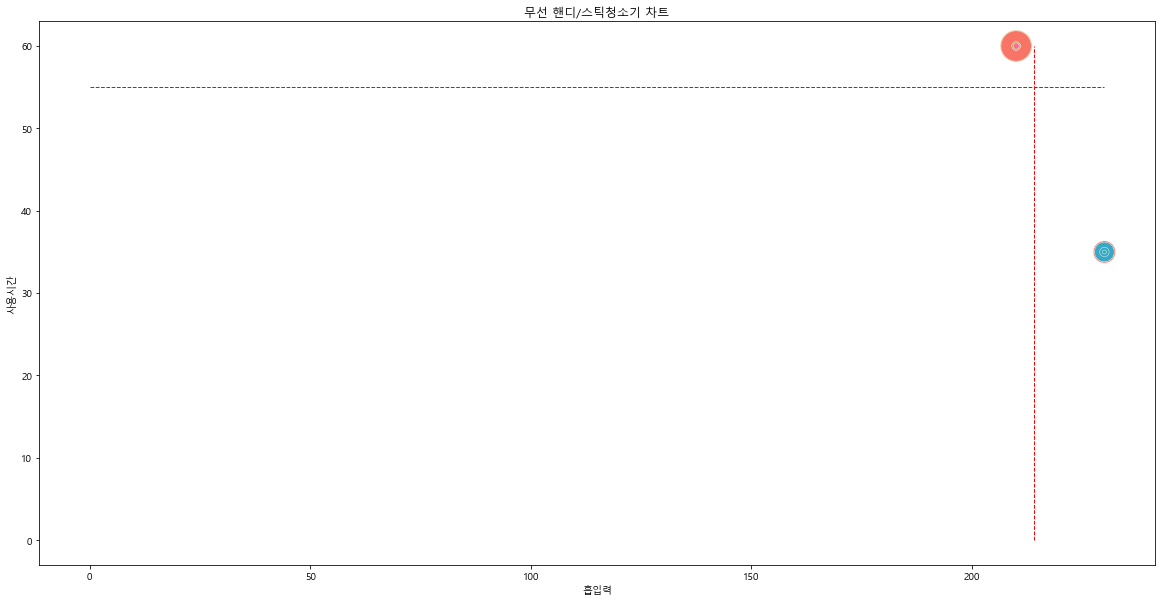

In [62]:
# 예제 7-43 청소기 성능 시각화
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], 
             data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [0, use_time_max_value], 
          'r--', 
          lw = 1 )
plt.show()

## 7.4.4 인기 제품의 데이터 시각화


In [63]:
# 예제 7-44 인기 제품 선택
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

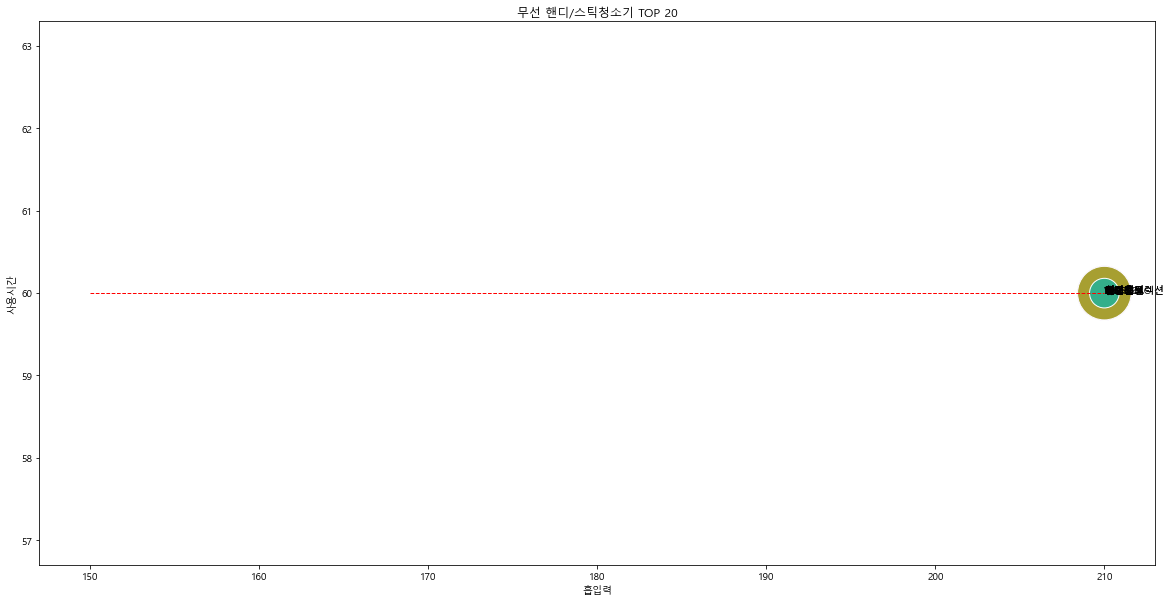

In [71]:
# 예제 7-45 흡입력, 사용시간의 최댓값/최솟값 정리
# 흡입력, 사용시간의 최댓값, 최솟값 구하기
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', 
                  y = '사용시간', 
                  size = '가격', 
                  hue = chart_data_selected['회사명'], 
                  data = chart_data_selected, sizes = (100, 3000),
                  legend = False)
plt.plot([150, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [60, use_time_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=10)
plt.show()